In [1]:

import math
import warnings
from datetime import datetime
start=datetime.now()
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree,model_selection
from sklearn.grid_search import GridSearchCV
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns
import time
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
start=datetime.now()
rfc = ensemble.RandomForestClassifier()
from sklearn.linear_model import LogisticRegression


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import 

In [2]:
data=pd.read_csv('C:/Users/ankush/Desktop/Melbourne_housing_FULL.csv')

In [543]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [3]:
'''# data['Price'].fillna(data['Price'].mean()).head()
#data=data.drop(data['YearBuilt'].idxmin(),axis=0)
#data['Bedroom2'].fillna((data['Rooms']), inplace=True)
#data['Bathroom'].fillna((data['Rooms']-1), inplace=True)
#data['Bathroom']=np.where(data['Bathroom']==0,1,data['Bathroom'])
#Mean in empty rows
#data['YearBuilt'].fillna((data['YearBuilt'].mean()), inplace=True)
#data['Postcode'].fillna((data['Postcode'].mean()), inplace=True)
#data['Distance'].fillna((data['Distance'].mean()), inplace=True)
#Fill car with mean data.
data['Car'].fillna((data['Car'].mean()), inplace=True)
#Fill Lattitude and Longtitude with the row above.
data['Lattitude'].fillna(method='ffill', inplace=True)
data['Longtitude'].fillna(method='ffill', inplace=True)

#Fill landsize and building area with median data.
data['Landsize'].fillna((data['Landsize'].median()), inplace=True)
data['BuildingArea'].fillna((data['BuildingArea'].median()), inplace=True)
data['Price'].fillna((data['Price'].mean()), inplace=True)
#data['BuildingArea'] = df['BuildingArea'].map(lambda x: x if x>0 else 0)'''

data['House Age']=(2019-data['YearBuilt'])
data=pd.get_dummies(data.drop(['Address', 'SellerG', 'Date','Landsize','BuildingArea'], 1)).dropna(0)

In [581]:
print(data.columns)

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt',
       ...
       'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object', length=418)


# Exploring the data

C:\Users\ankush\anacondanew\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


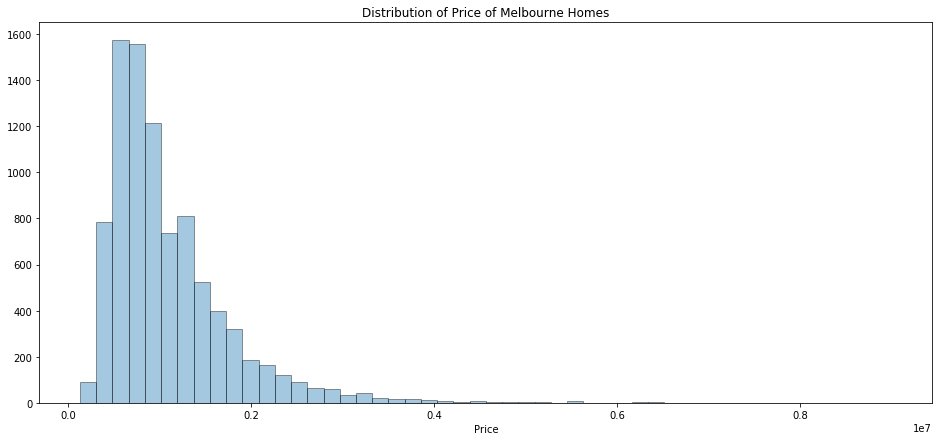

In [549]:
plt.figure(figsize=(16,7))
sns.distplot(data['Price'], kde = False,hist_kws=dict(edgecolor="k"))
plt.title('Distribution of Price of Melbourne Homes')
plt.show()

The housing prices seem to be normally distributed, there is no abnormality

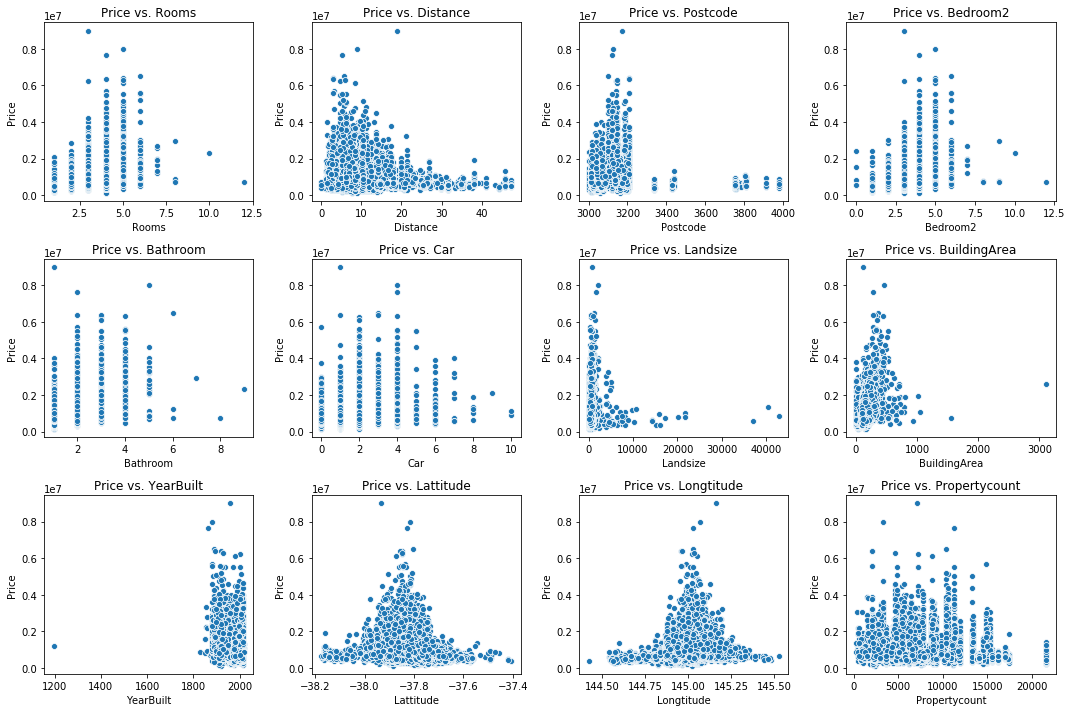

In [567]:
data1=data[['Rooms','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']]
plt.figure(figsize=(15,10))
i=1
for col in data1.columns:
    plt.subplot(3,4,i)
    sns.scatterplot(data1[col],data['Price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title('Price vs. {}'.format(col))
    i+=1
    
plt.tight_layout()
plt.show()


There are few things to be noticed-

1.Mojority of houses are in between 3000 to 3200 zipcode.

2.Majorirty of houses have 4-5 bedrooms

3.As rooms/bedrooms increase,price is also increasing


In [83]:
data1['Price'].describe()


count      34854.000
mean     1050179.964
std       567156.814
min        85000.000
25%       695000.000
50%      1050179.964
75%      1150000.000
max     11200000.000
Name: Price, dtype: float64

The above shows the mean price of housing is around 1 AUD

Text(0.5,1,'Variable Correlation')

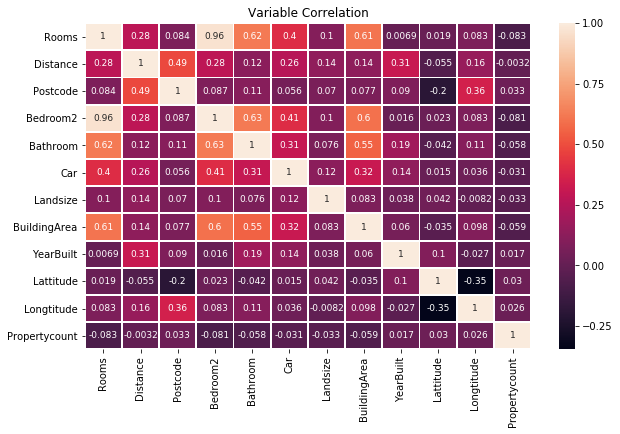

In [568]:
plt.figure(figsize=(10,6))
sns.heatmap(data1.corr(),linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

### Few things are noticed with the heatmap-
#### Weak Positive Correlation

Year Built and Price

#### Moderate Positive Correlation

Rooms and Price

Bathrooms and Price

Bathroom and Bedroom

Price and Distance



Since we have done some analysis about the features and their relation with the outcome variable prices,lets go ahead with using models to check the accuracy now.

In [4]:
#X=data.drop(['Price','Date','Address','Propertycount'],axis=1)
X=data.drop(['Price'],axis=1)
Y=data['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
#data = pd.DataFrame(preprocessing.scale(X), columns=X.columns)


Using Dimension Reduction PCA to reduce the features  and then use each model on these techniques as below

In [5]:
X_pca = PCA(n_components=200)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)

By using PCA, we can see 100 features are closely correlated to the output variable so we will keep them.Now we will use these techniques for each Regression model

1.GridsearchCV

2.R-squared

3.Cross Validation accuracy

4.Mean Square Error

In [10]:
#linear Regression
regr = linear_model.LinearRegression()
regr.fit(X_train_pca,y_train)
#Grid searchcv for Linear Regression 
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_class_lr = model_selection.GridSearchCV(regr,parameters, cv=10)

grid_class_lr.fit(X_train_pca,y_train)
#The best hyper parameters set

results = grid_class_lr.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_lr.best_params_)
print(grid_class_lr.best_score_)
final_model = grid_class_lr.best_estimator_
print(final_model)


[{'copy_X': True, 'fit_intercept': True, 'normalize': True}, {'copy_X': True, 'fit_intercept': True, 'normalize': False}, {'copy_X': True, 'fit_intercept': False, 'normalize': True}, {'copy_X': True, 'fit_intercept': False, 'normalize': False}, {'copy_X': False, 'fit_intercept': True, 'normalize': True}, {'copy_X': False, 'fit_intercept': True, 'normalize': False}, {'copy_X': False, 'fit_intercept': False, 'normalize': True}, {'copy_X': False, 'fit_intercept': False, 'normalize': False}]
[ 0.68582829  0.68582829 -2.02440474 -2.02440474  0.68582829  0.68582829
 -2.02440474 -2.02440474]
[ 0.70070137  0.70070137 -1.83111705 -1.83111705  0.02822445  0.70069474
 -1.83111705 -1.83111705]
Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.6858282859039206
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [11]:
#KNN
from sklearn import neighbors
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
#Use Gridsearchcv to get the best parameters for KNN
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
grid_class_knn = model_selection.GridSearchCV(knn, param_grid, cv=10)
grid_class_knn.fit(X_train_pca, y_train)
results = grid_class_knn.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class_knn.best_params_)
print(grid_class_knn.best_score_)
final_model = grid_class_knn.best_estimator_
print(final_model)

[{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}]
[0.36242312 0.46562537 0.50115537 0.50414614 0.5068363  0.50410734
 0.5017459  0.49633147 0.49342668 0.48842932]
[0.99994121 0.83950339 0.76395646 0.71798287 0.68316656 0.65777965
 0.63813367 0.61888603 0.60328041 0.5902685 ]
{'n_neighbors': 5}
0.5068363015504714
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [12]:
#Decision Tree
decision_tree = tree.DecisionTreeRegressor(max_depth=50)
decision_tree.fit(X_train, y_train)
dt_grid={'max_depth':[50],'max_features': [100]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_pca, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 100}]
[0.47013703]
[0.99997278]
{'max_depth': 50, 'max_features': 100}
0.4701370347726624
DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=100,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [13]:
#Random Forest
rfc = ensemble.RandomForestRegressor()
rfc.fit(X_train,y_train)
dt_grid={'max_depth':[3,4,5],'max_features': [100]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train, y_train)
grid_class_rfc.fit(X_train_pca, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 100}, {'max_depth': 4, 'max_features': 100}, {'max_depth': 5, 'max_features': 100}]
[0.55414507 0.62423194 0.66867277]
[0.57316047 0.66121986 0.72355849]
{'max_depth': 5, 'max_features': 100}
0.6686727687522622
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=100, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [14]:
#Ridge Regression
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)

#Gridsearchcv to tune the parameters
dt_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_class_rr=model_selection.GridSearchCV(ridgeregr,dt_grid,cv=6)
grid_class_rr.fit(X_train_pca, y_train)
results = grid_class_rr.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class_rr.best_params_)
print(grid_class_rr.best_score_)
final_model = grid_class_rr.best_estimator_
print(final_model)


[{'alpha': 25}, {'alpha': 10}, {'alpha': 4}, {'alpha': 2}, {'alpha': 1.0}, {'alpha': 0.8}, {'alpha': 0.5}, {'alpha': 0.3}, {'alpha': 0.2}, {'alpha': 0.1}, {'alpha': 0.05}, {'alpha': 0.02}, {'alpha': 0.01}]
[-1.93322286 -1.95027035 -1.96434897 -1.97119699 -1.97526009 -1.97613485
 -1.97748985 -1.9784232  -1.97889927 -1.97938178 -1.97962549 -1.97977252
 -1.97982166]
[-1.83733281 -1.8294692  -1.82653345 -1.82586803 -1.82566424 -1.82563742
 -1.82560732 -1.82559449 -1.82559038 -1.82558788 -1.82558724 -1.82558707
 -1.82558704]
{'alpha': 25}
-1.9332228649397738
Ridge(alpha=25, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
#SVR
svm = SVR()
svm.fit(X_train, y_train)
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(svm,param_grid,refit = True)
grid_class_svm.fit(X_train_pca, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [15]:
gbr = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5)
gbr.fit(X_train, y_train)
y_predict = gbr.predict(X_test)
param_grid={'n_estimators':[100], 'learning_rate': [0.1],'max_depth':[6], 'min_samples_leaf':[3], 'max_features':[1.0] } 
grid_class_gbr=model_selection.GridSearchCV(gbr,param_grid,refit = True)
grid_class_gbr.fit(X_train_pca, y_train)
results = grid_class_gbr.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_gbr.best_params_)
print(grid_class_gbr.best_score_)
final_model = grid_class_gbr.best_estimator_
print(final_model)

[{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 100}]
[0.75182291]
[0.94933317]
Best Hyper Parameters:
 {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 100}
0.7518229118983508
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


We have selected 200 components using PCA.Reason behind that since because of the total component more than 400.So, I played around with values to check the accuracies of the model.Its looks like the accuracies improved significantly at 200 and then to lower levels after that. All of the models performed ok except SVC and Ridge Regression.First passes with SVC( ) proved impossible. After over twelve hours on a single pass, I canceled the run and decided to pursue other options. This makes sense given the notes in the documentation. 
It looks there has been some overfitting in SVC model which made it to perform poorly.Now, we know which ones to neglect and which ones to compare.Gradient boost was the standout best in all the models with good values of parameters better than all others. Random Forest did better than Decision tree in terms of providing the best parameters.Random Forest and Decision tree were little slow which was expected because of the volumne of the data around 1.5 million.We have lots of features because of more added features to improve the accuracy.So, due to which everymodel is talking more time to run as expected.

R-squared for each model

In [17]:
print("R-squared for Linear Regression :",grid_class_lr.score(X_train_pca, y_train))
print("R-squared for KNN :",grid_class_knn.score(X_train_pca, y_train))
print("R-squared for Random Forest :",grid_class_rfc.score(X_train_pca, y_train))
print("R-squared for Decision Tree :",grid_class_dt.score(X_train_pca, y_train))
print("R-squared for Ridge Regression:",grid_class_rr.score(X_train_pca, y_train))
#print("R-squared for SVR :",grid_class_svr.score(X_train_pca, y_train))
print("R-squared for GBR :",grid_class_gbr.score(X_train_pca, y_train))

R-squared for Linear Regression : 0.6999550114073325
R-squared for KNN : 0.6889096696080385
R-squared for Random Forest : 0.7303126535125636
R-squared for Decision Tree : 0.9999669377457121
R-squared for Ridge Regression: -1.8453464346063408
R-squared for GBR : 0.9296726342897204


As observed above, r2 is excellent in Decision Tree and GBR which means that PCA has actually helped to improve the performance of the model.Other models have also performed as mediocre but standout ones are Random Forest and GBR.Ridge Regression has been peforming poorly.Ridge regression value is improving by decreasing the value of alpha close to 0. 

Cross Validation Accuracy for each model

In [19]:
print ("Training Data accuracy for Linear Regression : ",cross_val_score(grid_class_lr, X_train_pca,y_train, cv=5))
print ("Testing Data accuracy for Linear Regression ",cross_val_score(grid_class_lr, X_test_pca,y_test, cv=5))
print ("Training Data accuracy for KNN : ",cross_val_score(grid_class_knn, X_train_pca,y_train, cv=5))
print ("Testing Data accuracy for KNN ",cross_val_score(grid_class_knn, X_test_pca,y_test, cv=5))
print ("Training Data accuracy for Random Forest : ",cross_val_score(grid_class_rfc, X_train_pca,y_train, cv=5))
print ("Testing Data accuracy for Random Forest ",cross_val_score(grid_class_rfc, X_test_pca,y_test, cv=5))
print ("Training Data accuracy for Decision Tree : ",cross_val_score(grid_class_dt, X_train_pca,y_train, cv=5))
print ("Testing Data accuracy for Decision Tree ",cross_val_score(grid_class_dt, X_test_pca,y_test, cv=5))
print ("Training Data accuracy for Ridge Regression : ",cross_val_score(grid_class_rr, X_train_pca,y_train, cv=5))
print ("Testing Data accuracy for Ridge Regression ",cross_val_score(grid_class_rr, X_test_pca,y_test, cv=5))
#print ("Training Data accuracy for SVR : ",cross_val_score(grid_class_svr, X_train_pca,y_train, cv=5))
#print ("Testing Data accuracy for SVR ",cross_val_score(grid_class_svr, X_test_pca,y_test, cv=5))
print ("Training Data accuracy for GBR : ",cross_val_score(grid_class_gbr, X_train_pca,y_train, cv=5))
print ("Testing Data accuracy for GBR ",cross_val_score(grid_class_gbr, X_test_pca,y_test, cv=5))

Training Data accuracy for Linear Regression :  [0.70239802 0.69793988 0.70087996 0.63094933 0.69375975]
Testing Data accuracy for Linear Regression  [0.69374803 0.65766631 0.65493507 0.67774129 0.68863573]
Training Data accuracy for KNN :  [0.50016069 0.51337653 0.51266355 0.4562014  0.50734787]
Testing Data accuracy for KNN  [0.36017896 0.35542035 0.27624873 0.26506178 0.3116418 ]
Training Data accuracy for Random Forest :  [0.68649149 0.67669358 0.68258957 0.6267596  0.66753144]
Testing Data accuracy for Random Forest  [0.70731438 0.66571805 0.596617   0.64543528 0.67509925]
Training Data accuracy for Decision Tree :  [0.45455844 0.49172725 0.56518606 0.48619996 0.5419541 ]
Testing Data accuracy for Decision Tree  [0.47250264 0.3280086  0.42532052 0.48638681 0.43938652]
Training Data accuracy for Ridge Regression :  [-1.90397593 -1.99035725 -1.84466522 -1.98349897 -1.95725255]
Testing Data accuracy for Ridge Regression  [-1.61662625 -2.10040729 -1.97600473 -2.69228893 -2.08728275]
T

Accuracy is as expected GBR and Random Forest are better performing than rest of the models

In [ ]:
Root Mean Squared Error for each model

In [30]:
from sklearn.metrics import mean_squared_error
y_pred_lr = grid_class_lr.predict(X_train_pca)
print('RMSE for Linear Regression:',np.sqrt(mean_squared_error(y_train,y_pred_lr)))
from sklearn.metrics import mean_squared_error
y_pred_knn= grid_class_knn.predict(X_train_pca)
print('RMSE for KNN:',np.sqrt(mean_squared_error(y_train,y_pred_knn)))
from sklearn.metrics import mean_squared_error
y_pred_dt = grid_class_dt.predict(X_train_pca)
print('RMSE for Decision Tree:',np.sqrt(mean_squared_error(y_train,y_pred_dt)))
from sklearn.metrics import mean_squared_error
y_pred_rfc = grid_class_rfc.predict(X_train_pca)
print('RMSE for Random Forest:',np.sqrt(mean_squared_error(y_train,y_pred_rfc)))
from sklearn.metrics import mean_squared_error
y_pred_rr = grid_class_rr.predict(X_train_pca)
print('RMSE for Ridge Regression:',np.sqrt(mean_squared_error(y_train,y_pred_rr)))
from sklearn.metrics import mean_squared_error
#y_pred_svr = grid_class_lr.predict(X_train_pca)
#print('RMSE for SVR:',np.sqrt(mean_squared_error(y_train,y_pred)))
from sklearn.metrics import mean_squared_error
y_pred_gbr = grid_class_gbr.predict(X_train_pca)
print('RMSE for GBR:',np.sqrt(mean_squared_error(y_train,y_pred_gbr)))

RMSE for Linear Regression: 371286.94929366536
RMSE for KNN: 378059.1481254798
RMSE for Decision Tree: 3897.469508684827
RMSE for Random Forest: 352003.3368405998
RMSE for Ridge Regression: 1143362.8340981894
RMSE for GBR: 179754.04429996907


Room Mean square error shows that GBR and Decision Tree has performed better than others.I am actually surprised by how decision tree has performed.GBR should have been the best here.I need to do further analysis for decision tree.

We will now SelectKbest(SKB) for getting the best features and play around for deeper analysis.My expectation is the minium number of components we might chose here will be 100 and then going to 200 and lets check the accuracy and overfitting as well.It's likely these feature selection techniques (aside from PCA) are choosing most of the same features, so in some sense it doesn't really matter which we pick (in fact,One advantage of SKB is that it is fast to run, so we'll save time 

In [47]:
skb = SelectKBest(k=100)
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 30  31  40  63  65 103 104 114 122 141 145 147 167 176 183 187 191 207
 214 216 228 234 237 247 261 268 269 278 283 294 295 318 333 337 343 349
 355 360 361 366 369 371 373 397] are constant.
  UserWarning)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
#Gridsearchcv for Linear Regression
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_class_lr = model_selection.GridSearchCV(regr,parameters, cv=10)

grid_class_lr.fit(X_train_skb,y_train)
#The best hyper parameters set

results = grid_class_lr.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_lr.best_params_)
print(grid_class_lr.best_score_)
final_model = grid_class_lr.best_estimator_
print(final_model)

In [49]:
#Gridsearchcv for KNN
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
grid_class_knn = model_selection.GridSearchCV(knn, param_grid, cv=10)
grid_class_knn.fit(X_train_skb, y_train)
results = grid_class_knn.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class_knn.best_params_)
print(grid_class_knn.best_score_)
final_model = grid_class_knn.best_estimator_
print(final_model)

[{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}]
[0.36195573 0.5219898  0.56624186 0.57600112 0.57583124 0.57728546
 0.57439939 0.57291181 0.5701221  0.57002879]
[0.99990795 0.84247039 0.78421082 0.75126793 0.72490111 0.70161749
 0.68514408 0.67165718 0.65967318 0.65019456]
{'n_neighbors': 6}
0.577285462655612
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [50]:
#Gridsearchcv for Decision tree
dt_grid={'max_depth':[50],'max_features': [100]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_skb, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 100}]
[0.53990244]
[0.99995636]
{'max_depth': 50, 'max_features': 100}
0.5399024415776409
DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=100,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [51]:
#Gridsearchcv for Random Forest
dt_grid={'max_depth':[3,4,5],'max_features': [100]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train, y_train)
grid_class_rfc.fit(X_train_skb, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 100}, {'max_depth': 4, 'max_features': 100}, {'max_depth': 5, 'max_features': 100}]
[0.49792592 0.59162978 0.65052292]
[0.50807887 0.61791343 0.68669389]
{'max_depth': 5, 'max_features': 100}
0.65052291740122
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=100, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [52]:
#Gridsearchcv for Ridge Regression
dt_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_class_rr=model_selection.GridSearchCV(ridgeregr,dt_grid,cv=6)
grid_class_rr.fit(X_train_skb, y_train)
results = grid_class_rr.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class_rr.best_params_)
print(grid_class_rr.best_score_)
final_model = grid_class_rr.best_estimator_
print(final_model)


[{'alpha': 25}, {'alpha': 10}, {'alpha': 4}, {'alpha': 2}, {'alpha': 1.0}, {'alpha': 0.8}, {'alpha': 0.5}, {'alpha': 0.3}, {'alpha': 0.2}, {'alpha': 0.1}, {'alpha': 0.05}, {'alpha': 0.02}, {'alpha': 0.01}]
[0.65189038 0.65643942 0.65825239 0.65860788 0.65856494 0.65850913
 0.65836391 0.65820024 0.65808619 0.65794095 0.65785313 0.6577945
 0.65777385]
[0.65850817 0.66427479 0.66701019 0.66791533 0.66832514 0.66839704
 0.66849192 0.66854154 0.66856005 0.66857268 0.66857621 0.66857727
 0.66857742]
{'alpha': 2}
0.6586078761771604
Ridge(alpha=2, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
'''#Gridsearchcv for SVM
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(svm,param_grid,refit = True)
grid_class_svm.fit(X_train_skb, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [53]:
#Gridsearchcv for GBR
param_grid={'n_estimators':[100], 'learning_rate': [0.1],'max_depth':[6], 'min_samples_leaf':[3], 'max_features':[1.0] } 
grid_class_gbr=model_selection.GridSearchCV(gbr,param_grid,refit = True)
grid_class_gbr.fit(X_train_skb, y_train)
results = grid_class_gbr.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_gbr.best_params_)
print(grid_class_gbr.best_score_)
final_model = grid_class_gbr.best_estimator_
print(final_model)

[{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 100}]
[0.780869]
[0.90335322]
Best Hyper Parameters:
 {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 100}
0.7808689959584044
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


SKB took less time to run when compared to PCA but the accuracies and parameters that we have got are similar to what we got with PCA.So, nothing of a surprise here,GBR performed the best and took less than time as well


R-squared for each model after SKB

In [41]:
print("R-squared for Linear Regression :",grid_class_lr.score(X_train_skb, y_train))
print("R-squared for KNN :",grid_class_knn.score(X_train_skb, y_train))
print("R-squared for Random Forest :",grid_class_rfc.score(X_train_skb, y_train))
print("R-squared for Decision Tree :",grid_class_dt.score(X_train_skb, y_train))
print("R-squared for Ridge Regression:",grid_class_rr.score(X_train_skb, y_train))
#print("R-squared for SVR :",grid_class_svr.score(X_train_skb, y_train))
print("R-squared for GBR :",grid_class_gbr.score(X_train_skb, y_train))

R-squared for Linear Regression : 0.6676830251010037
R-squared for KNN : 0.7064220264837288
R-squared for Random Forest : 0.6698274975264502
R-squared for Decision Tree : 0.9999465730300496
R-squared for Ridge Regression: 0.6671981876146231
R-squared for GBR : 0.8881824584103694


Similar R2 score what we have in PCA with GBR and Decision tree peforming the best

Cross Validation score after SKB

In [45]:
print ("Training Data accuracy for Linear Regression : ",cross_val_score(grid_class_lr, X_train_skb,y_train, cv=5))
print ("Testing Data accuracy for Linear Regression ",cross_val_score(grid_class_lr, X_test_skb,y_test, cv=5))
print ("Training Data accuracy for KNN : ",cross_val_score(grid_class_knn, X_train_skb,y_train, cv=5))
print ("Testing Data accuracy for KNN ",cross_val_score(grid_class_knn, X_test_skb,y_test, cv=5))
print ("Training Data accuracy for Random Forest : ",cross_val_score(grid_class_rfc, X_train_skb,y_train, cv=5))
print ("Testing Data accuracy for Random Forest ",cross_val_score(grid_class_rfc, X_test_skb,y_test, cv=5))
print ("Training Data accuracy for Decision Tree : ",cross_val_score(grid_class_dt, X_train_skb,y_train, cv=5))
print ("Testing Data accuracy for Decision Tree ",cross_val_score(grid_class_dt, X_test_skb,y_test, cv=5))
print ("Training Data accuracy for Ridge Regression : ",cross_val_score(grid_class_rr, X_train_skb,y_train, cv=5))
print ("Testing Data accuracy for Ridge Regression ",cross_val_score(grid_class_rr, X_test_skb,y_test, cv=5))
#print ("Training Data accuracy for SVR : ",cross_val_score(grid_class_svr, X_train_skb,y_train, cv=5))
#print ("Testing Data accuracy for SVR ",cross_val_score(grid_class_svr, X_test_skb,y_test, cv=5))
print ("Training Data accuracy for GBR : ",cross_val_score(grid_class_gbr, X_train_skb,y_train, cv=5))
print ("Testing Data accuracy for GBR ",cross_val_score(grid_class_gbr, X_test_skb,y_test, cv=5))

Training Data accuracy for Linear Regression :  [ 0.70007987 -1.17541797  0.69456837  0.58721573  0.6775598 ]
Testing Data accuracy for Linear Regression  [-1.52876352e+03 -3.08056297e+03 -1.32937403e+00 -2.21308443e+03
 -6.90383792e+01]
Training Data accuracy for KNN :  [0.50074031 0.5133182  0.51928285 0.45389503 0.50976894]
Testing Data accuracy for KNN  [0.36008851 0.35561227 0.27584989 0.26542093 0.31194446]
Training Data accuracy for Random Forest :  [0.69022296 0.65913418 0.67942107 0.61538558 0.66783233]
Testing Data accuracy for Random Forest  [0.68740555 0.68552999 0.65248436 0.66819192 0.69256606]
Training Data accuracy for Decision Tree :  [0.55637668 0.56009513 0.48773444 0.55749337 0.59028321]
Testing Data accuracy for Decision Tree  [0.48497108 0.6046247  0.53816476 0.53633362 0.45920883]
Training Data accuracy for Ridge Regression :  [0.70189366 0.69235822 0.69438485 0.62303568 0.68537603]
Testing Data accuracy for Ridge Regression  [0.69954585 0.65767439 0.65259449 0.6

Accuracy is as expected GBR and Random Forest are better performing than rest of the models

Root Mean square Error After SKB

In [54]:
from sklearn.metrics import mean_squared_error
y_pred_lr = grid_class_lr.predict(X_train_skb)
print('RMSE for Linear Regression:',np.sqrt(mean_squared_error(y_train,y_pred_lr)))
y_pred_knn= grid_class_knn.predict(X_train_skb)
print('RMSE for KNN:',np.sqrt(mean_squared_error(y_train,y_pred_knn)))
y_pred_dt = grid_class_dt.predict(X_train_skb)
print('RMSE for Decision Tree:',np.sqrt(mean_squared_error(y_train,y_pred_dt)))
y_pred_rfc = grid_class_rfc.predict(X_train_skb)
print('RMSE for Random Forest:',np.sqrt(mean_squared_error(y_train,y_pred_rfc)))
y_pred_rr = grid_class_rr.predict(X_train_skb)
print('RMSE for Ridge Regression:',np.sqrt(mean_squared_error(y_train,y_pred_rr)))
from sklearn.metrics import mean_squared_error
#y_pred_svr = grid_class_lr.predict(X_train_pca)
#print('RMSE for SVR:',np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred_gbr = grid_class_gbr.predict(X_train_skb)
print('RMSE for GBR:',np.sqrt(mean_squared_error(y_train,y_pred_gbr)))

RMSE for Linear Regression: 390744.39607587823
RMSE for KNN: 367263.8896776226
RMSE for Decision Tree: 4954.465031453509
RMSE for Random Forest: 386332.42127838416
RMSE for Ridge Regression: 391029.3325918234
RMSE for GBR: 226658.21547829246


Similar to PCA, GBR and Decision tree performing well.But i think the most consistent model  here is GBR if compared to other models

# Conclusion

I will consider using GBR here over other models.Here are the few reasons -

1.Accuracy score is better than others

2.Better R-squared score with which it can more accurately predict the outcome

3.Fastest in all of the models

Also, i have tried to analyse the data through all the feature providing every insight in the data and the way each feature is behaving to impact the price.Cleaning the data was essential since without that a correct and meaningful prediction cannot be made.I had to replace null values in  price with mean value and few other feature with median values in order to make the dataset consistent.The accuracy and R2 seems to be doing fairly well for GBR and Random Forest.Run times seem to be less as well.We need to further analysis and check ,how we can increase the accuracy so that the predictions are also better.Models like SVC,Decision tree were very slow and their accuracy was on the lower side as well.So, these models can be ignored here.